In [21]:
# a scikit-learn package to do NMF
 #Importing Necessary packages
import gensim
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('processedDEV.csv')
df=df.drop(['Unnamed: 0'], axis = 1)
my_list=df.to_numpy().tolist()
#my_list

In [3]:
#my_doc=pd.read_csv('C:/Users/Kois/unLemmatizedCorpus.csv') #unLemmatized tokens
my_root=pd.read_csv('C:/Users/Kois/lemmatizedCorpus.csv') #Lemmatized tokens
my_root=my_root.drop(['Unnamed: 0.1'], axis = 1)
my_root=my_root.drop(['Unnamed: 0'], axis = 1)
my_root=my_root.to_numpy().tolist()
len(my_root)

7050

In [4]:
#docgen=[]
new_list=[]
temp_list=[]
for x in my_root:
    for item in x:
        if str(item) != 'nan':
            temp_list.append(item)
            #docgen.append(item)
    new_list.append(temp_list)
    temp_list=[]
#new_list

In [5]:
stop_words=['እኔ', 'የእኔ', 'እኔራሤ', 'እኛ', 'የእኛ', 'እኛራሣችን', 'አንቺ', 'ነህ', 'አላችሁ', 'እርሥዎ', 'ትፈልጋለህ', 'ያንተ', 'ራሥህን', 'እራሣችሁ', 'እሡ', 'የእሡ',
 'ራሡ', 'እሷ', 'እሷናት', 'የእሷ', 'እራሷ', 'ነው', 'እነሡ', 'እነሡን', 'የእነሡ', 'ራሣቸው', 'ምንድን', 'የትኛው', 'ማን', 'ይህ', 'የሚልነው', 'ያ', 'እነዚህ', 'እነዚያ', 'ነኝ', 'ናቸው', 'ነበር', 'ነበሩ', 'ሁን', 'ቆይቷል', 'መሆን',
 'አላቸው', 'አለው', 'ነበረው', 'ያለው', 'መሥራት', 'ያደርጋል', 'አደረገ', 'ማድረግ', 'ሀ', 'አንድ', 'የ', 'እና', 'ከሆነ', 'ወይም', 'ምክንያቱም',
 'እንደ', 'እሥከ', 'እያለ', 'በ', 'ለ', 'ጋር', 'ሥለ', 'ላይ', 'መካከል', 'ወደ', 'በኩል', 'ወቅት', 'ከዚህበፊት', 'በኋላ', 'ከላይ', 'ከታች', 'ከ', 'ወደላይ', 'ታች', 'ውሥጥ', 'ውጭ', 'በላይ',
 'እንደገና', 'ተጨማሪ', 'ከዚያ', 'አንድጊዜ', 'እዚህ', 'እዚያ', 'መቼ', 'የት', 'ለምን', 'እንዴት', 'ሁሉም', 'ማንኛውም', 'ሁለቱም', 'እያንዳንዳቸው', 'ጥቂቶች', 'በጣም', 'ሌላ', 'አንዳንድ',
 'እንደዚህ', 'ብቻ', 'የራሡ', 'ተመሣሣይ', 'ሥለዚህ', 'ይልቅ', 'እንዲሁ', 'ት', 'ይችላል', 'ይገባል', 'ይገባኛል', 'አሁን', 'መ', 'ም', 'ኦ', 'ዳግም',
 'መሆን', 'ሁለ', 'ሁለም', 'ህዝብ', 'ሀሙሥ', 'ለመሆኑ', 'ለምንድን', 'ሌሎች', 'መጽሀፍ', 'ማክሠኞ', 'ምን', 'ሠኞ', 'ሠው', 'ሢሆን', 'ሥንት', 'ረቡእ',
 'ቅዳሜ', 'በዚህ', 'ብላ', 'ነገር', 'አለ', 'አርብ', 'አንተ', 'አንዳንድ', 'ኢትዮጵያ', 'እሁድ', 'እናንተ', 'እንኳን', 'እግር', 'ከመሆን', 'ወይንም', 'ዋና', 'ዘንድ', 'የሚከተለው', 'ያኔ', 'ይኼው', 'ገጽ', 'እነርሡ',
 'ን', 'ና', 'ዎች', 'ይጠበቃል', 'ብለዋል', 'ሆ', 'ሁሉ', 'አንቀጽ', 'እንደሆነ', 'በማይበልጥ', 'መሠረት', 'ሁኔታ', 'ይሆናል', 'ሆኖ', 'ከአንድ', 'በማናቸውም',
 'ወር', 'ከአምሥት', 'በሆነ', 'ከዚህ', 'የሆነ', 'ሀያ', 'ሆነ', 'በኊላ', 'በአንድ', 'የሆኑ', 'ከአሥራ', 'የሆነውን', 'መሆኑ', 'ሌላውን', 'ከሠባት', 'ለሌላ',
 'አለበት', 'ሢል', 'ይሆናሉ', 'በሙሉ', 'አሥራ', 'ቢሆንም', 'አንዱ', 'የሌላውን', 'ከሁለት', 'የሆኑትን', 'በሆኑ', 'ጀምሮ', 'በመሆን', 'ባለ', 'ይህንን', 'እንዲቆይ', 'ሌላው', 'የሚሆነው', 'በአንዱ', 'ሢባል', 'ሣለ', 'የሆነው', 'መሆናቸው', 'በዋና', 'በማቀድ', 'ጊዜና', 'ለዚህ', 'ሦሥተኛ', 'የነገሩ', 'ሥድሥት', 'በሆነው', 'ይሁን', 'ከዚሁ', 'በእነዚህ', 'ከማናቸውም', 'ከነበረው',
 'በአንዳንድ', 'በእያንዳንዱ', 'ጊዜም', 'አሥከ', 'የሌሎች', 'የሚሆኑት', 'ከሆነው', 'የነበረውን', 'ያሉ', 'ከሌሎች', 'አንዲት', 'ለሌሎች', 'ለሆነው', 'ሠኣት', 'ብሎ', 'ከሠላሣ',
 'የሚሆኑ', 'ላይም', 'የሆናል', 'ከነዚህ', 'ያህል', 'ከሆነና', 'ለሆኑት', 'እነዚሁ', 'እንደሆኑ', 'ሥለማናቸውም', 'ሥለዚሁ', 'ከአንዳንድ',
 'በእነዚሁ', 'በአምሥት', 'የሆኑበታል', 'ለነዚህ', 'ለማንኛውም', 'አንደኛ', 'ይኸኛው', 'ከርሡ', 'መሆኑን', 'ለዚያው', 'ለዚሁ', 'ለእነርሡም', 'እዚሁ', 'ሀ', 'ረ', 'ሸ', 'አምሥት',
 'ከሦሥት', 'በተለይም', 'በሌላ', 'ሺህ', 'ማናቸውንም', 'ከአሥር', 'የማይበልጥ', 'እንዲሁም', 'ይህን', 'የዚህ', 'ማናቸውም', 'ከሥድሥት', 'መቶ', 'ያለ', 'አንድን',
 'ያላቸውን', 'ሊሆን', 'ሦሥት', 'ካልሆነ', 'ቢያንሥ', 'ቢሆን', 'እነዚህን', 'አንዱን', 'ሁለት', 'ወይዘሮ', 'ተብሎ', 'ሣይሆን', 'እንደሆነና', 'ከብር', 'ሆኖም', 'የነበሩ',
 'የሌላ', 'ያላቸው', 'ይህንኑ', 'ሆነው', 'በሥተቀር', 'ሥም', 'እንደገና', 'የማያንሥ', 'እጅግ', 'እንዲሆን', 'እንኳ', 'ከሀያ', 'ከሀምሣ', 'ይኸው', 'ለአንድ', 'የሚችለውን',
 'በሚገባ', 'ይህም', 'እንዲሆኑ', 'ከሌላ', 'ለሆነ', 'በሌሎች', 'አንደሆነ', 'እንዲህ', 'በነዚሁ', 'በእንደዚህ', 'ሥምንት', 'ሢሆንና', 'ምንጊዜም', 'ለማናቸውም', 'የአንድ', 'እነዚህኑ', 'ሢሆኑ', 'በሁለቱም',
 'እንደነዚህ', 'የሆኑት', 'የማናቸውም', 'ይህንንም', 'የአንድን', 'በሙሉም', 'በነዚህ', 'የዚሁ', 'ለእያንዳንዱ', 'ሥለሆነ', 'መሆናቸውን', 'ማንኛውንም', 'ሁለቱ', 'እንጂ',
 'ከሥምንት', 'ሁለቱንም', 'በሁለት', 'በእሥር', 'በሚል', 'ቁጥር', 'ባሉ', 'ከመቶ', 'እነዚህም', 'ሢኖር', 'ሠላሣ', 'ለሆኑ', 'ሠባት', 'እነደሆነ', 'ይህችው', 'ከእነዚህ',
 'ከእነዚሁ', 'የአንቀጹ', 'ወይ', 'የሆነችን']

In [6]:
def stopWordRemoval(tokens):
    token_new=[]
    for x in tokens:
        if x not in stop_words:
            token_new.append(x)
    return token_new

In [7]:
processed_docs=[]
for item in new_list:
    processed_docs.append(stopWordRemoval(item))
processed_docs

[['ልዩ', 'ተፈጥሮ', 'ገጽታ', 'ምስራቅ', 'አፍሪካ', 'ውሀ', 'ማማ', 'ጮቅ'],
 ['ሀገር',
  'ጥቅም',
  'ተሰለፈ',
  'ሰጠ',
  'መላጣ',
  'ነአ',
  'የሻቢይን',
  'ይሁንታ',
  'ተገኘ',
  'ሀገር',
  'ባህር',
  'ሰጠ',
  'ታምራት',
  'እውነታ',
  'ውርእ',
  'እርር',
  'መጣ',
  'ሚሊዮን',
  'አበረ'],
 ['ብጄ',
  'አሳምነው_ጽጌ',
  'ምክትል',
  'ጠማ',
  'ደመቀ',
  'ሱዳን',
  'ጉብኝት',
  'አልበሽር',
  'ተመስገን',
  'ነገረ',
  'ጥር',
  'ጎረቤት',
  'ከህወሀት',
  'ግን',
  'ቤተሰብ'],
 ['"ትልልቅ',
  'ነደደ',
  'ፍጆታ',
  'ተሽከርካሪ',
  'አየር',
  'ብክለት',
  'አኳያ',
  'ነዳጅ',
  'ወጣ',
  'ረገድ',
  'ለየ',
  'ኤክሳይዝ_ታክስ',
  'ጣለ',
  'ገባ',
  'ሊትር',
  'ኪሎ',
  'ሜትር',
  'ነዳ',
  'ለየ',
  'አተያይ',
  'ኖረ',
  'ጠይቀዋል"'],
 ['እሺ', 'ወንድም', 'ተከለ', 'ማኛ', 'እኮ', 'ወዳታለሁ', 'ደሞ', 'ቀና', 'አሉ'],
 ['ይቺ', 'አወቀ', 'ዶር_አብይ', 'ክርስቲያን', 'የሆነዋኧረ', 'ጀንፈሉ', 'እንጣጥ', 'እንጣጥ', 'ዋዋዋ'],
 ['ፈለገ',
  'መብት',
  'ኖረ',
  'መብት',
  'ወሰነ',
  'ግን',
  'ኖረ',
  'ሀገር',
  'ህግ',
  'ኖረ',
  'ቻለ',
  'መብት',
  'እኩልነት',
  'ተገኛኘ',
  'ህግ'],
 ['ንነቴ', 'ኢትዮጵያዊነቴ', 'መታ', 'አወቀ', 'ተከለ'],
 ['ለቅዳሚታችሁ',
  'ሰረረ',
  'ምሉእነትና',
  'እርካታ',
  'ሰማ',
  'የአሁንነት',
  'ሀይል',
  'መንፈሳዊ',
  'እውቀት',
  'ብር

In [8]:
 #covert list into a single string
text_data=[]
 docgen=[]
for x in processed_docs:
    str_docs=' '.join(x)
    text_data.append(str_docs)
    for item in x:
        docgen.append(item)

In [9]:
# converting the given text term-document matrix
 
vectorizer = TfidfVectorizer(max_features=1500, min_df=10)
X = vectorizer.fit_transform(text_data)
words = np.array(vectorizer.get_feature_names())

print(X)
print("X = ", words)

  (0, 965)	0.4024440704349471
  (0, 780)	0.4580618183405678
  (0, 191)	0.4932903626390473
  (0, 549)	0.4807167509381865
  (0, 83)	0.3921659906788894
  (1, 701)	0.26591240559055024
  (1, 156)	0.3393954538667488
  (1, 147)	0.21685252972815244
  (1, 970)	0.3001283279573019
  (1, 410)	0.3486548138707853
  (1, 535)	0.21499203317737567
  (1, 268)	0.4017734532765899
  (1, 468)	0.3315667765315688
  (1, 1241)	0.297279775250266
  (1, 16)	0.3866313905524116
  (2, 426)	0.28836180704527753
  (2, 1181)	0.19222388150431888
  (2, 1198)	0.3484213405809473
  (2, 1236)	0.2400437783388785
  (2, 606)	0.27235807724488353
  (2, 1155)	0.3623212698455725
  (2, 275)	0.3623212698455725
  (2, 1048)	0.3395092432190958
  (2, 1212)	0.33557536901735696
  (2, 207)	0.36914674534347713
  :	:
  (7047, 1220)	0.2929062688894968
  (7047, 1275)	0.284045099579184
  (7047, 1037)	0.2303407393682081
  (7047, 620)	0.2565197936147786
  (7047, 80)	0.41430361050975734
  (7047, 341)	0.1888231858132542
  (7047, 109)	0.2552176893416394

In [10]:
# Applying Non-Negative Matrix Factorization
 
nmf = NMF(n_components=10, solver="mu")
W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: ሰራ,ሰማ,ፈለገ,ኖረ,ጀመረ,ቻለ,መንግስት,ሀገር,ሰጠ,ገባ
Topic 2: ብዙ,አከከ,ግልጽ,ስራ,ሰማ,ተናገረ,አይ,አሰበ,ህይወት,አወቀ
Topic 3: አሰበ,አይን,ተግባር,ቅዱስ_ጊዮርጊስ,ቆመ,ተመለከተ,ነበረ,ብዙ,ጊዜ,አየ
Topic 4: ጌታ,መልካም,ልደት,እግዚአብሄር,ሀገር,ፍቅር,አል,አሜን,ደረሰ,ሰላም
Topic 5: አወገዘ,ጸረ,ገደለ,ትግራይ,ኦሮሞ,መንግስት,ኦሮሚያ,ሙስሊም,ክልል,አማራ
Topic 6: መርዝ,አይደል,ወደደ,ሄደ,ይሄ,በላ,ውነት,እኮ,እንዴ,መሰለ
Topic 7: ሰማ,ቀረበ,እግዚአብሄር,ምክንያት,ደግ,ጊዜ,ልጅ,ኖረ,ተስፋ,ድርግ
Topic 8: ነካ,ጠፋ,ለም,አመነ,አሰበ,ከባድ,ብዙ,መታ,ኖረ,ግን
Topic 9: ቀጠለ,ሰራ,ተመኘ,መሰረተ,ጊዜ,ብልጽግና,መልካም,ፓርቲ,አዲስ,አመት
Topic 10: ይሄ,አሰበ,ብልጽግና,መብት,ፓርቲ,ሀገር,አብይ,ፍቅር,ኦሮሞ,ነዉ


C:\Users\Kois\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [11]:
w2v_model = gensim.models.Word2Vec(sentences=processed_docs, min_count=1, sg=1)

In [12]:
vocabulary = w2v_model.wv.index_to_key
v1=w2v_model.wv['ሚያረገዉ']
print(v1)

[ 0.00053511  0.04689642 -0.00203235 -0.01609385 -0.00211598 -0.08705724
  0.00469604  0.1053516  -0.01231372 -0.03220878 -0.02111943 -0.05362529
 -0.0037     -0.00656405  0.02064233 -0.063348   -0.00234746 -0.06905711
  0.00934372 -0.05960843  0.03856033  0.01216502  0.01862372 -0.02331031
 -0.01913793 -0.0032866  -0.03298717 -0.01670907 -0.04123745  0.00280255
  0.0599161   0.02232845  0.00593744 -0.02668804  0.00081469  0.03064626
  0.00820572 -0.03603282 -0.01630585 -0.07677407  0.00617143 -0.03437576
 -0.03170689  0.01224454  0.02802721 -0.02259036 -0.03703237  0.00134517
  0.01946278  0.03962875  0.00197091 -0.04761438 -0.01880257 -0.00844477
 -0.01568711  0.01824153  0.01491506 -0.0021558  -0.04665694  0.01926922
  0.00926229  0.03696302  0.00011211  0.02211923 -0.0277104   0.04369979
  0.01943269  0.0331244  -0.0669064   0.06060578 -0.0366753   0.00994308
  0.03746981 -0.01574293  0.03939523  0.01013731  0.00225634 -0.0134126
 -0.0280896   0.02584581 -0.01125752 -0.01857704 -0.

In [13]:
print("Model has %d terms" % len(w2v_model.wv.key_to_index))

Model has 16177 terms


In [14]:
kmin, kmax = 4, 15

In [15]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform(X)
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...


C:\Users\Kois\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=13 ...
Applying NMF for k=14 ...


C:\Users\Kois\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Applying NMF for k=15 ...


C:\Users\Kois\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [16]:
from itertools import combinations
def calculate_coherence(w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2 ):
               pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]) )
           # get the mean for all pairs in this topic
               topic_score = sum(pair_scores) / len(pair_scores)
               overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [17]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append(all_terms[term_index] )
    return top_terms

In [18]:
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor(docgen, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append(k)
    try:
        coherences.append(calculate_coherence(w2v_model, term_rankings ) )
    except KeyError:
        coherences.append(calculate_coherence(w2v_model, term_rankings ) )
        #coherences.append(43)
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=04: Coherence=43.2037
K=05: Coherence=43.3907
K=06: Coherence=43.4737
K=07: Coherence=43.0778
K=08: Coherence=43.2017
K=09: Coherence=43.3075
K=10: Coherence=43.2605
K=11: Coherence=43.2532
K=12: Coherence=43.3858
K=13: Coherence=43.4155
K=14: Coherence=43.3891
K=15: Coherence=43.5861


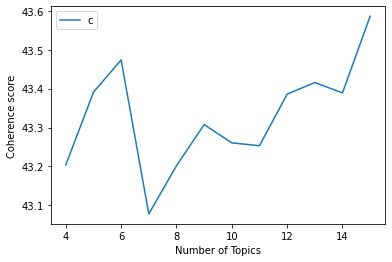

In [22]:
plt.plot(k_values, coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

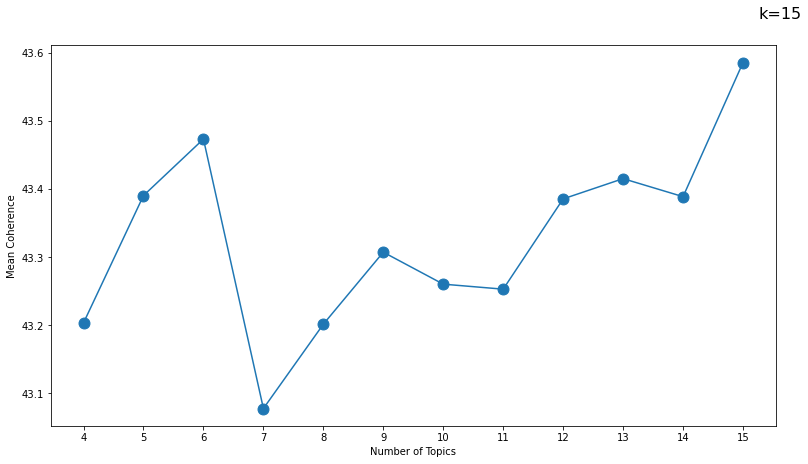

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()